### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 5


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

1. Набор данных oxford_iiit_pet с изменением разрешения до 96х64 

2. Классы с метками 3,14,25,35,36 

3. Требования к архитектуре сети MLP: 

Функциональный API при создании 

Функция потерь: категориальная кросс-энтропия 

Кол-во скрытых слоев 6 

Кол-во нейронов 50 в первом скрытом слое, увеличивающееся на 5 с каждым последующим скрытым слоем 

Использование слоев с регуляризацией L2 

4. Требования к архитектуре сети CNN: 

Последовательный API со списком слоев при создании 

Функция потерь: разреженная категориальная кросс-энтропия 

Кол-во сверточных слоев 3 

Количество фильтров в сверточных слоях 16 

Размеры фильтра 5х5 

Использование слоев пакетной нормализации 

5. Требования к архитектуре сети RNN: 

Последовательный API с методом add() при создании 

Функция потерь: категориальная кросс-энтропия 

Слой LSTM с 64 нейронами 

Использование слоев dropout 

6. Показатель качества многоклассовой классификации: 

средняя полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу. 

 

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, и валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить. 
2.	Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.
3.	Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры обучения, как оптимизатор, начальная скорость обучения самостоятельно, обеспечивая обучение нейронных сетей. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения. 
4.	Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством. 
5.	Визуализируйте кривые обучения трех построенных моделей для показателя потерь на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальную потери на первой эпохе).
6.	Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.
7.	Для каждого из классов определите два изображения в тестовой выборке, имеющее минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.



# 1. датасет

In [1]:
# %pip install tfds-nightly
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install tensorflow
# %pip install pillow
# %pip install tensorflow_model_analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL

2024-05-23 20:24:37.079858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 20:24:38.260171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ds = tfds.load("oxford_iiit_pet")
train = ds['train']
test = ds['test']
train = tfds.as_dataframe(train)
test = tfds.as_dataframe(test)
train.head(3)

2024-05-23 20:24:45.641776: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-05-23 20:24:48.192539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-23 20:24:50.604905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [3]:
# Split the test dataset in a validation set and a test set
validate = test.sample(frac=0.2)
test = test.drop(validate.index)

In [4]:
# scale images
WIDTH = 96
HEIGHT = 64

train_images = np.array([np.array(PIL.Image.fromarray(i).resize((WIDTH, HEIGHT))) for i in train['image']]) / 255
test_images = np.array([np.array(PIL.Image.fromarray(i).resize((WIDTH, HEIGHT))) for i in test['image']]) / 255
validate_images = np.array([np.array(PIL.Image.fromarray(i).resize((WIDTH, HEIGHT))) for i in validate['image']]) / 255

train_labels = np.array(train['label'])
test_labels = np.array(test['label'])
validate_labels = np.array(validate['label'])

# 2. выделение требуемых изображений

In [5]:
# retain only images where the label is 3,14,25,35,36 
target_labels = [3, 14, 25, 35, 36]
train_images = np.array([train_images[i] for i in range(len(train_images)) if train_labels[i] in target_labels])
train_labels = np.array([train_labels[i] for i in range(len(train_labels)) if train_labels[i] in target_labels])
test_images = np.array([test_images[i] for i in range(len(test_images)) if test_labels[i] in target_labels])
test_labels = np.array([test_labels[i] for i in range(len(test_labels)) if test_labels[i] in target_labels])
validate_images = np.array([validate_images[i] for i in range(len(validate_images)) if validate_labels[i] in target_labels])
validate_labels = np.array([validate_labels[i] for i in range(len(validate_labels)) if validate_labels[i] in target_labels])


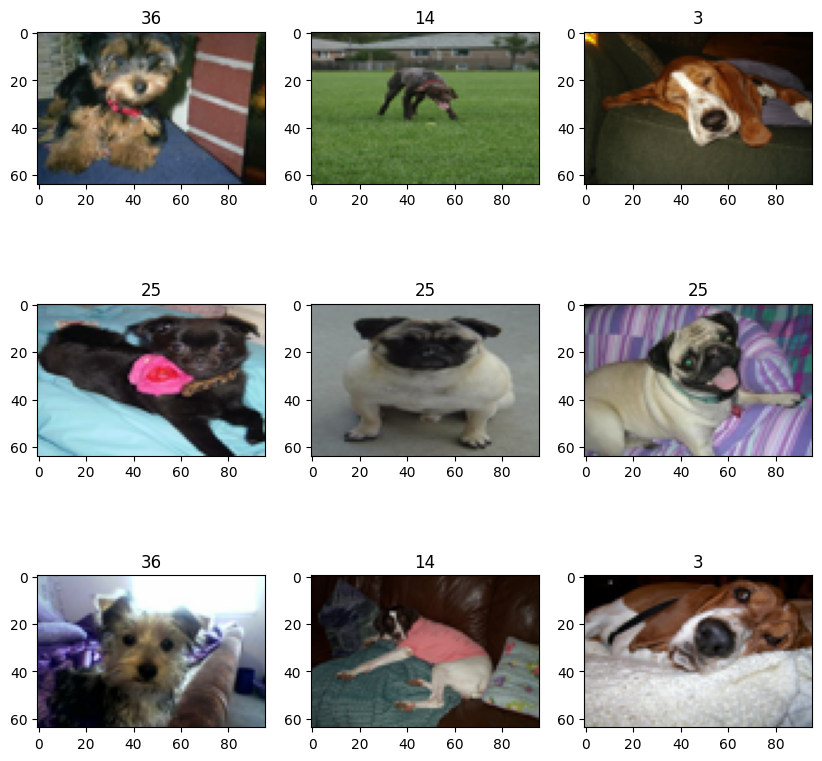

In [6]:
# preview some images
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(train_labels[i * 3 + j])
        ax[i][j].imshow(PIL.Image.fromarray((train_images[i * 3 + j] * 255).astype(np.uint8)))

In [7]:
# prepare the dataset with one-hot encoding
train_labels = np.array([target_labels.index(i) for i in train_labels])
test_labels = np.array([target_labels.index(i) for i in test_labels])
validate_labels = np.array([target_labels.index(i) for i in validate_labels])

train_labels_1h = tf.keras.utils.to_categorical(train_labels)
test_labels_1h = tf.keras.utils.to_categorical(test_labels)
validate_labels_1h = tf.keras.utils.to_categorical(validate_labels)

train_labels_1h.shape, test_labels_1h.shape, validate_labels_1h.shape

((500, 5), (388, 5), (112, 5))

In [8]:
# prepare the labels with indexed encoding
train_labels_as_idx = np.argmax(train_labels_1h, axis=1) # .reshape(-1, 1)
test_labels_as_idx = np.argmax(test_labels_1h, axis=1) # .reshape(-1, 1)
validate_labels_as_idx = np.argmax(validate_labels_1h, axis=1) # .reshape(-1, 1)

In [9]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=20)


In [10]:
# make a MLP model to classify the images
# use regularization
from tensorflow.keras import layers as L

neurons = 50
regularization_rate = 0.01

inputs = L.Input(shape=(HEIGHT, WIDTH, 3))
x = L.Flatten()(inputs)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(eval('[neurons, exec("neurons += 5")][0]'), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_rate))(x)
x = L.Dense(len(target_labels), activation='softmax')(x)

mlp_model = tf.keras.Model(inputs=inputs, outputs=x)

mlp_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       921,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 55)             │         2,805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 65)             │         3,965 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         5,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 942,105 (3.59 MB)

 Trainable params: 942,105 (3.59 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# use as metric the average recall for each class
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
mlp_history = mlp_model.fit(train_images, train_labels_1h, epochs=500, validation_data=(validate_images, validate_labels_1h), callbacks=[early_stop_callback])

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2210 - loss: 5.6643 - val_accuracy: 0.1696 - val_loss: 5.0048
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2421 - loss: 4.7711 - val_accuracy: 0.1161 - val_loss: 4.6169
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2344 - loss: 4.2742 - val_accuracy: 0.1875 - val_loss: 4.0530
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2395 - loss: 3.9562 - val_accuracy: 0.2500 - val_loss: 3.7857
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2737 - loss: 3.6202 - val_accuracy: 0.2679 - val_loss: 3.5740
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3020 - loss: 3.3967 - val_accuracy: 0.2589 - val_loss: 3.5238
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4379 - loss: 3.1345 - val_accuracy: 0.2857 - val_loss: 3.2366
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4422 - loss: 2.9516 - val_accuracy: 0.

In [13]:
# make a CNN model to classify the images
cnn_model = tf.keras.Sequential([
    L.Input(shape=(HEIGHT, WIDTH, 3)),
    L.BatchNormalization(),
    L.Conv2D(16, (5, 5), activation='relu', ),
    L.Conv2D(16, (5, 5), activation='relu', ),
    L.Conv2D(16, (5, 5), activation='relu', ),
    L.Conv2D(16, (5, 5), activation='relu', ),
    L.MaxPool2D(pool_size=(2, 2), padding="same"),
    L.Flatten(),
    # L.BatchNormalization(),
    # L.Dense(13, activation='relu'),
    # L.BatchNormalization(),
    L.Dense(len(target_labels), activation='softmax'),
    # L.Dense(1, activation='softmax'),
])

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 64, 96, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 60, 92, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 88, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 84, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 80, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 40, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 15360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │        76,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,281 (380.00 KB)

 Trainable params: 97,275 (379.98 KB)

 Non-trainable params: 6 (24.00 B)

In [14]:
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [15]:
cnn_history = cnn_model.fit(train_images, train_labels_as_idx, epochs=500, validation_data=(validate_images, validate_labels_as_idx), callbacks=[early_stop_callback])

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.2072 - loss: 1.6597 - val_accuracy: 0.1696 - val_loss: 1.6261
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.3756 - loss: 1.5093 - val_accuracy: 0.2321 - val_loss: 1.7045
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5288 - loss: 1.2124 - val_accuracy: 0.3661 - val_loss: 1.5600
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.6123 - loss: 1.1268 - val_accuracy: 0.2232 - val_loss: 1.8555
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.7337 - loss: 0.8107 - val_accuracy: 0.2679 - val_loss: 2.0711
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 383ms/step - accuracy: 0.8230 - loss: 0.5355 - val_accuracy: 0.2768 - val_loss: 1.9778
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.8899 - loss: 0.3144 - val_accuracy: 0.2946 - val_loss: 2.4825
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.9476 - loss: 0.2173 - val_accu

In [16]:
train_images.shape

(500, 64, 96, 3)

In [17]:
train_shape = train_images.shape
test_shape = test_images.shape
validate_shape = validate_images.shape
rnn_train_images = train_images.reshape(train_shape[0], np.prod(train_shape[1:]))
rnn_test_images = test_images.reshape(test_shape[0], np.prod(test_shape[1:]))
rnn_validate_images = validate_images.reshape(validate_shape[0], np.prod(validate_shape[1:]))
rnn_train_images.shape

(500, 18432)

In [18]:
# make a RNN model to classify the images
rnn_model = tf.keras.Sequential()
rnn_model.add(L.Input(shape=rnn_train_images.shape[1:]))
rnn_model.add(L.Reshape((1, np.prod(rnn_train_images.shape[1:]))))
rnn_model.add(L.LSTM(64))
rnn_model.add(L.Dropout(0.2))
rnn_model.add(L.Dense(len(target_labels), activation='softmax'))

rnn_model.summary()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 1, 18432)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │     4,735,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,735,557 (18.06 MB)

 Trainable params: 4,735,557 (18.06 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
rnn_history = rnn_model.fit(rnn_train_images, train_labels_1h, epochs=500, validation_data=(rnn_validate_images, validate_labels_1h), callbacks=[early_stop_callback])

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.2386 - loss: 1.8986 - val_accuracy: 0.1786 - val_loss: 1.6247
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2473 - loss: 1.6459 - val_accuracy: 0.1607 - val_loss: 1.6208
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1700 - loss: 1.6767 - val_accuracy: 0.1518 - val_loss: 1.6333
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2337 - loss: 1.6559 - val_accuracy: 0.1964 - val_loss: 1.6134
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2352 - loss: 1.6417 - val_accuracy: 0.1607 - val_loss: 1.6236
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2352 - loss: 1.6288 - val_accuracy: 0.2321 - val_loss: 1.6087
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2243 - loss: 1.6122 - val_accuracy: 0.2232 - val_loss: 1.6017
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2234 - loss: 1.6513 - val_accuracy: 0.

# 3. оценка лучшей модели

In [20]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
models = {
    'MLP': mlp_model,
    'CNN': cnn_model,
    'RNN': rnn_model
}

In [22]:
predictions_raw = {
    'MLP': mlp_model.predict(test_images),
    'CNN': cnn_model.predict(test_images),
    'RNN': rnn_model.predict(rnn_test_images)
}

predictions = {
    'MLP': np.argmax(predictions_raw['MLP'], axis=1),
    'CNN': np.argmax(predictions_raw['CNN'], axis=1),
    'RNN': np.argmax(predictions_raw['RNN'], axis=1)
}

ground_truth = test_labels_as_idx

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [23]:
from sklearn.metrics import recall_score

scores = {
    x: recall_score(ground_truth, predictions[x], average='micro') for x in models
}

In [24]:
scores

{'MLP': 0.4175257731958763,
 'CNN': 0.39690721649484534,
 'RNN': 0.30927835051546393}

In [25]:
from IPython import display as D
disp = D.display
MD = D.Markdown

In [26]:
best_model = max(scores, key=scores.get)

disp(MD(f'## Лучшая модель {best_model} с оценкой {scores[best_model]}'))

## Лучшая модель MLP с оценкой 0.4175257731958763

In [27]:
models[best_model].summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       921,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 55)             │         2,805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 65)             │         3,965 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         5,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,826,317 (10.78 MB)

 Trainable params: 942,105 (3.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,884,212 (7.19 MB)

# 5. кривые обучения

In [28]:
histories = {
    'MLP': mlp_history,
    'CNN': cnn_history,
    'RNN': rnn_history
}

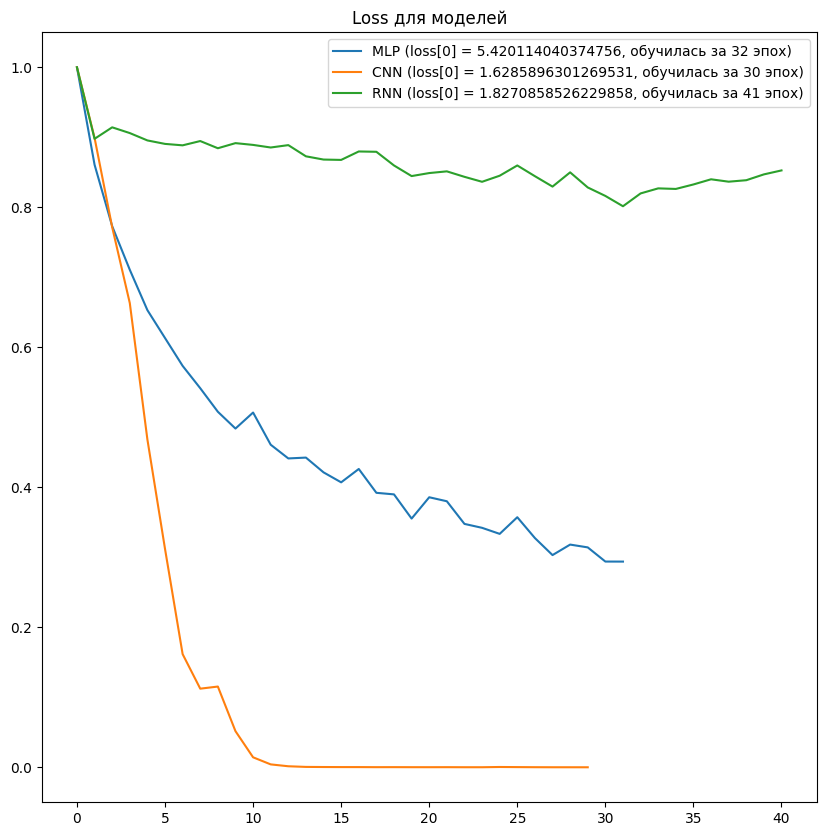

In [32]:
ax, fig = plt.subplots(figsize=(10, 10))

for model in histories:
    basis = histories[model].history['loss'][0]
    relative_loss = [x / basis for x in histories[model].history['loss']]
    plt.plot(relative_loss, label=model + f' (loss[0] = {basis}, обучилась за {len(histories[model].history["loss"])} эпох)')

plt.title("Loss для моделей")
plt.legend()

# 6. кривые валидации

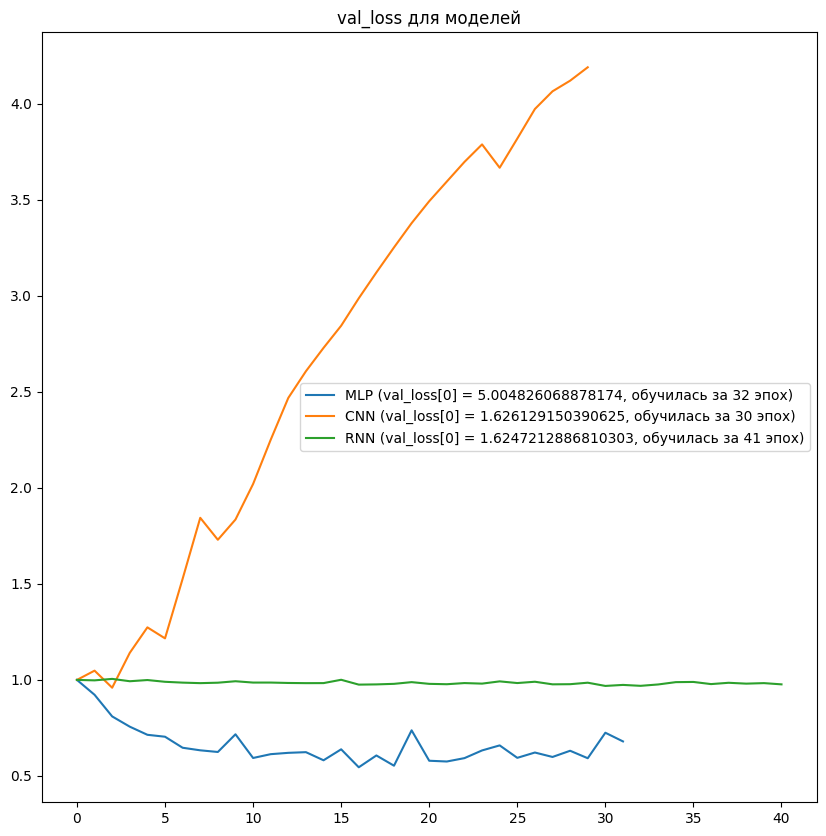

In [30]:
ax, fig = plt.subplots(figsize=(10, 10))

for model in histories:
    basis = histories[model].history['val_loss'][0]
    relative_loss = [x / basis for x in histories[model].history['val_loss']]
    plt.plot(relative_loss, label=model + f' (val_loss[0] = {basis}, обучилась за {len(histories[model].history["val_loss"])} эпох)')

plt.title("val_loss для моделей")
plt.legend()

# 7. изображения с вероятностью классификации

## Класс 3

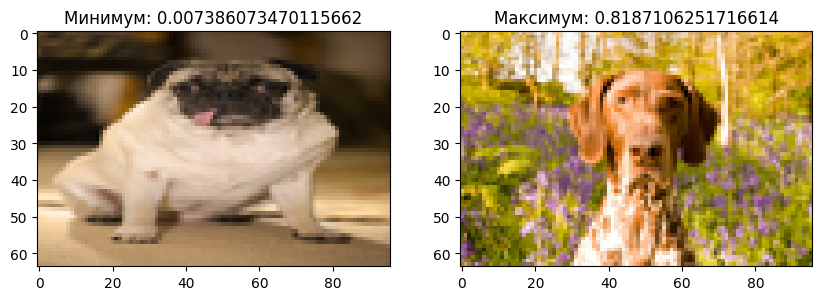

## Класс 14

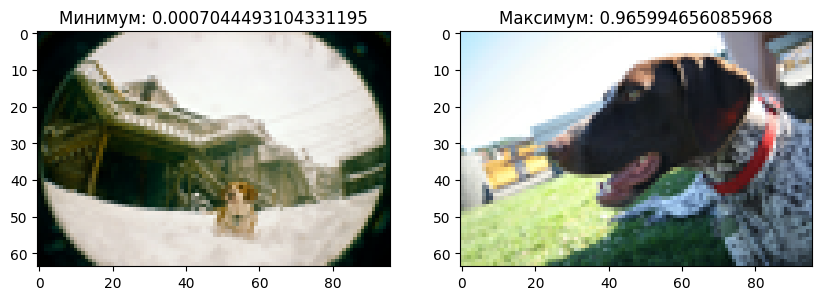

## Класс 25

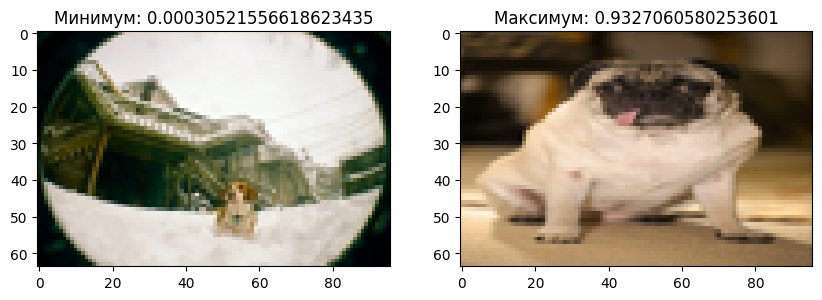

## Класс 35

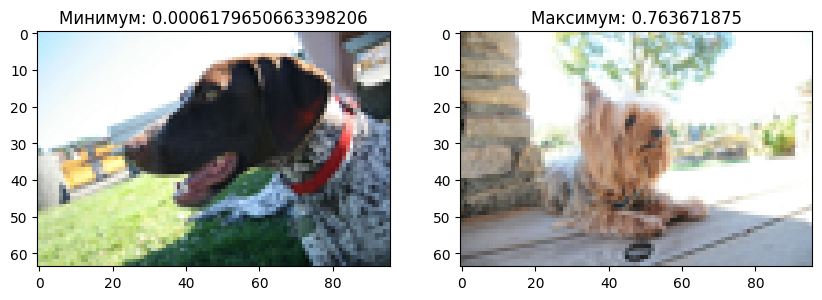

## Класс 36

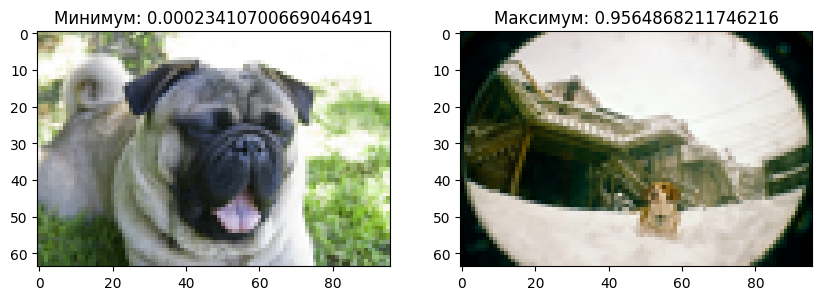

In [31]:
# for every class, find the image that's most and least likely to be classified as that class
for i in range(5):
    most_likely = np.argmax(predictions_raw[best_model][:, i])
    least_likely = np.argmin(predictions_raw[best_model][:, i])
    most_likely_score = np.max(predictions_raw[best_model][:, i])
    least_likely_score = np.min(predictions_raw[best_model][:, i])

    ax, fig = plt.subplots(1, 2, figsize=(10, 10))
    disp(MD(f'## Класс {target_labels[i]}'))
    fig[1].set_title(f"Максимум: {most_likely_score}")
    fig[1].imshow(test_images[most_likely])
    fig[0].set_title(f"Минимум: {least_likely_score}")
    fig[0].imshow(test_images[least_likely])
    plt.show()
